<a href="https://colab.research.google.com/github/salvi007/Walmart-ConfidenceInterval---CLT/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("walmart_data.csv")   #importing the dataset

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.shape   #no of rows is 550068 and no of columns is 10

(550068, 10)

In [ ]:
df.isna().sum()   #No null values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


**Purchase has the max mean and std deviation and median**


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

**More Males than Females**




In [ ]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

**26-35 age group has max number of counts and lease number of counts is for 0-17 age group**

In [ ]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

**City B has max number of records**

In [ ]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

**More unmarried than married**

In [ ]:
df["User_ID"].nunique()

5891

**Total 5891 users are there**

In [ ]:
df["Product_ID"].nunique()

3631

**Total 3631 products are there**

#Univariate Analysis

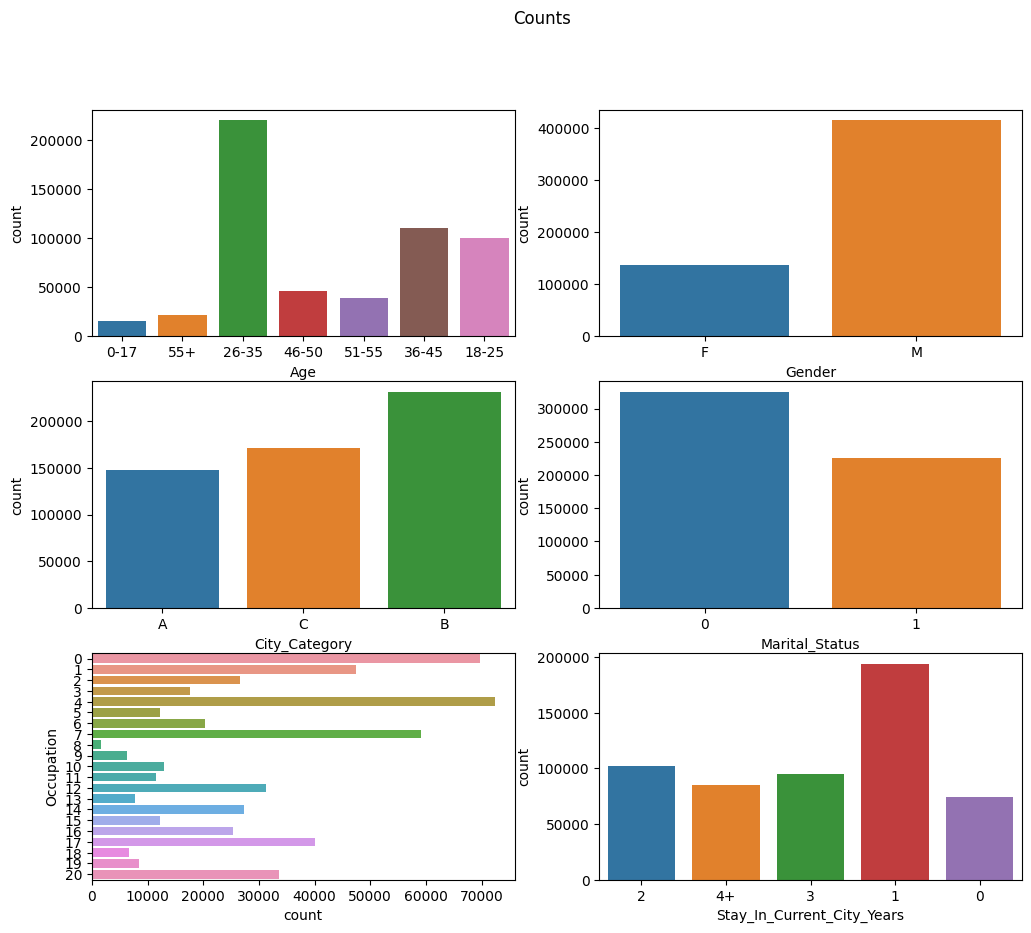

In [ ]:
fig=plt.figure(figsize=(12,10)).suptitle("Counts")

plt.subplot(3,2,1)
sns.countplot(data=df,x="Age")


plt.subplot(3,2,2)
sns.countplot(data=df,x="Gender")


plt.subplot(3,2,3)
sns.countplot(data=df,x="City_Category")


plt.subplot(3,2,4)
sns.countplot(data=df,x="Marital_Status")

plt.subplot(3,2,5)
sns.countplot(data=df,y="Occupation")

plt.subplot(3,2,6)
sns.countplot(data=df,x="Stay_In_Current_City_Years")

plt.show()

*   Most of the age of the persons of the data lies between 26-35
*   Data has more number of Males than Females
*   More unmarried people and less married
*   Most number of people are living in city B then in city C then in city A
*   There are 20 different types of occupation in the city.
*   Most number of people who are staying the city is for 1 year


Text(0.5, 0, 'Purchase')

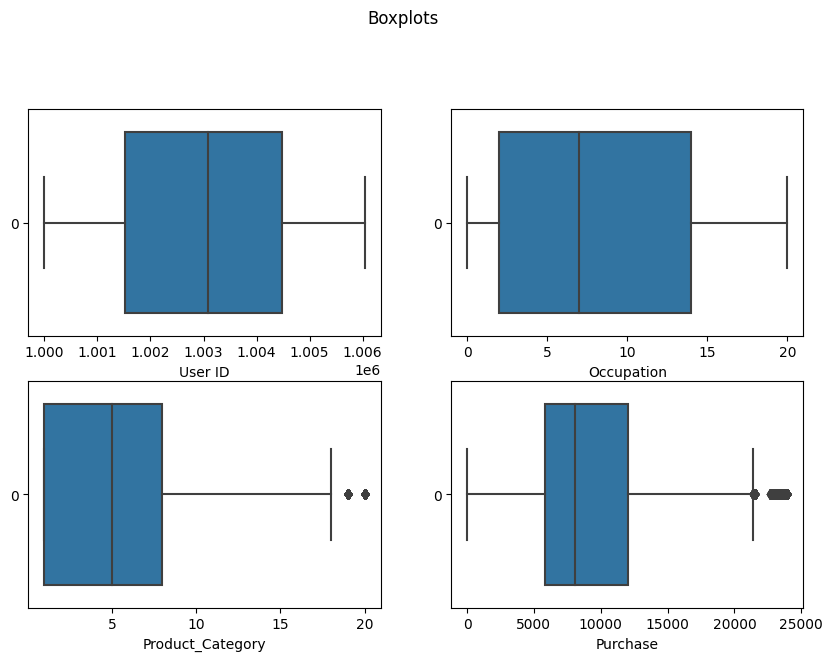

In [ ]:
fig=plt.figure(figsize=(10,10)).suptitle("Boxplots")

plt.subplot(3,2,1)
sns.boxplot(df["User_ID"],orient='h')
plt.xlabel("User ID")

plt.subplot(3,2,2)
sns.boxplot(df["Occupation"],orient='h')
plt.xlabel("Occupation")

plt.subplot(3,2,3)
sns.boxplot(df["Product_Category"],orient='h')
plt.xlabel("Product_Category")

plt.subplot(3,2,4)
sns.boxplot(df["Purchase"],orient='h')
plt.xlabel("Purchase")



**Only Purchase has max number of outliers.**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## **Bi-Variate Analysis**

<Axes: xlabel='Gender', ylabel='count'>

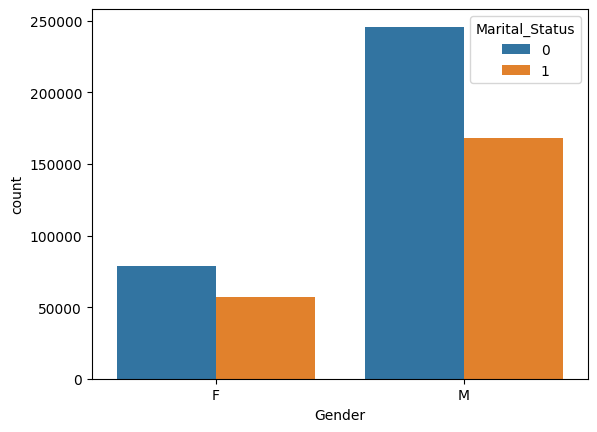

In [ ]:
#Bi-Variate Analysis

sns.countplot(x="Gender",hue="Marital_Status",data=df)


**In Females category, most people are unmarried and in Males, most number of people are unmarried.**

<Axes: xlabel='Gender', ylabel='Purchase'>

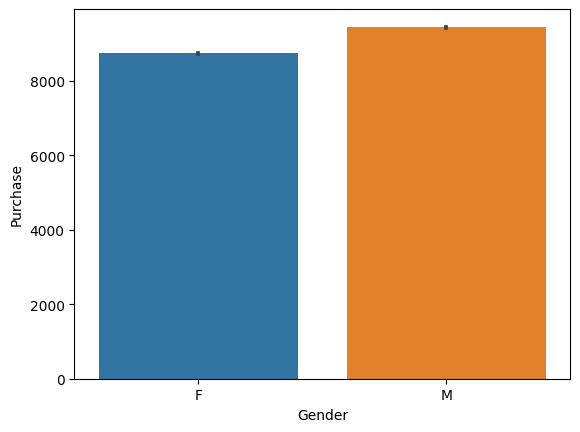

In [ ]:
sns.barplot(x="Gender",y="Purchase",data=df)


**Men are spending more money than Women**

In [ ]:
df.corr()

<ipython-input-300-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<ipython-input-301-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

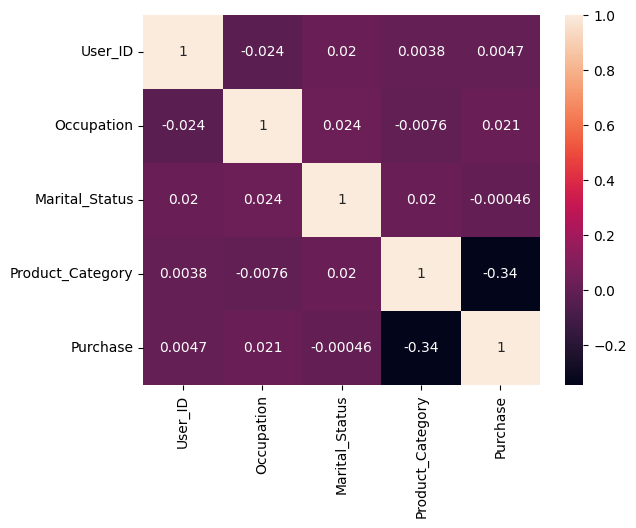

In [ ]:
sns.heatmap(df.corr(),annot=True)

In the above heatmap linear relationship between data points is evaluated

Correlation between User_ID and Purchase is 0.0047

Correlation between Occupaton and Product_category is -0.0076

Correlation between Marital_Status and Occupation is 0.024

Correlation between Product_category and Purchase is -0.34



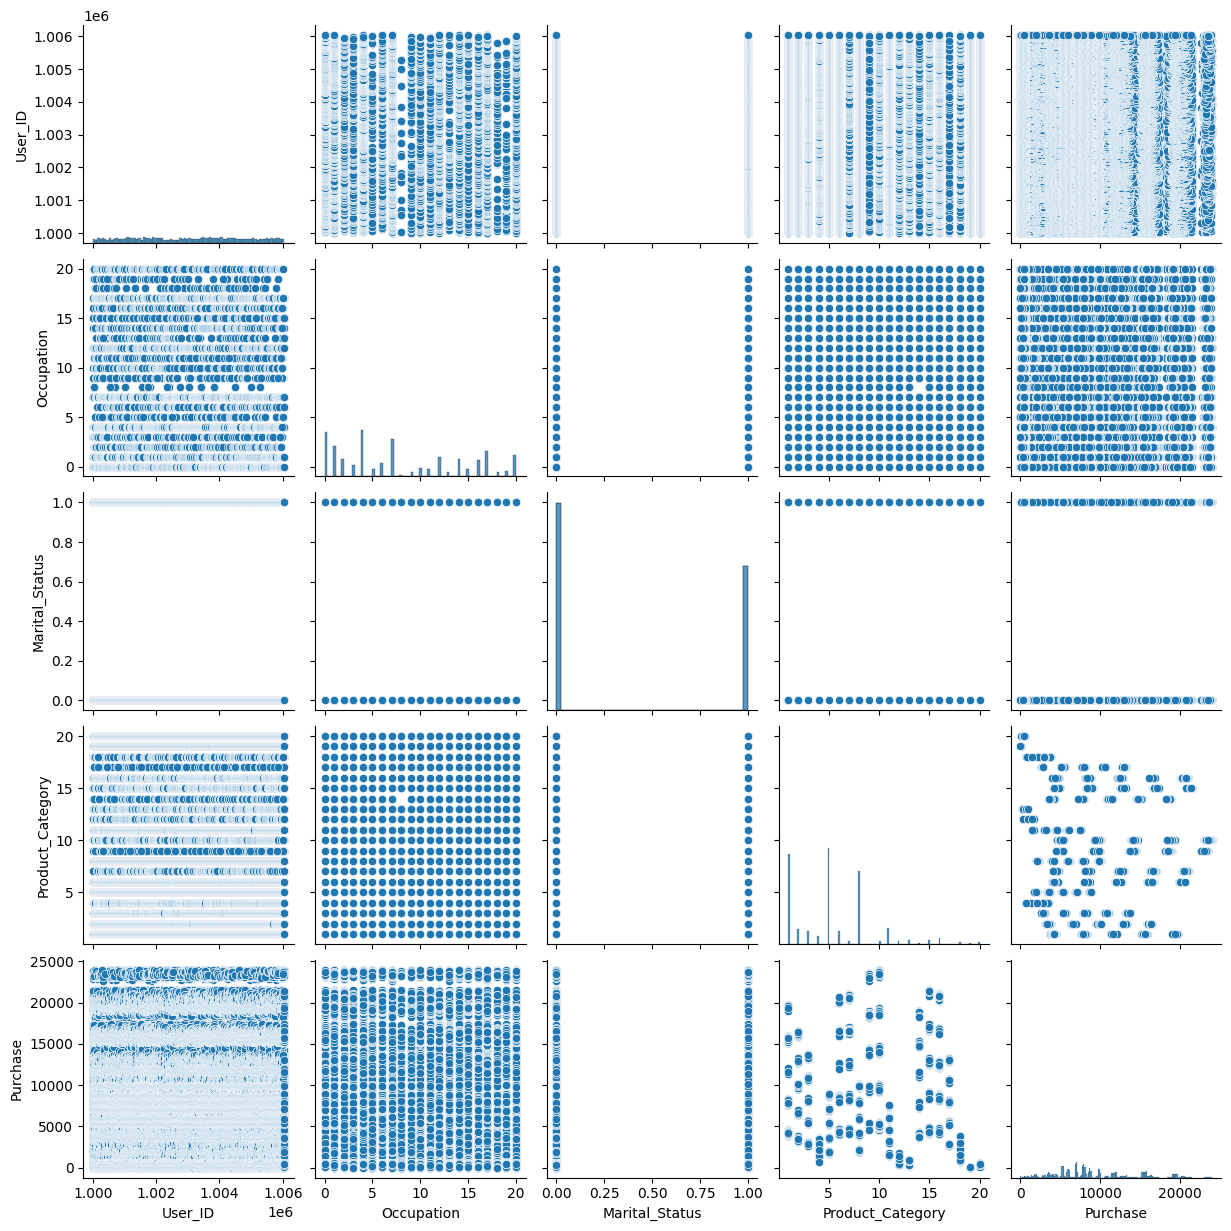

In [ ]:
sns.pairplot(data=df)

In [ ]:
purch_male=df[df["Gender"]=="M"]["Purchase"]
purch_female=df[df["Gender"]=="F"]["Purchase"]


In [ ]:
purch_male.sample(10)

76403      8895
497352    20636
127773     4092
111367    19530
22838      5372
148604     7781
151227     7833
438511     6898
541682    15857
519403    15280
Name: Purchase, dtype: int64

In [ ]:
sampling_distribution_data_male=[np.mean(purch_male.sample(100)) for i in range(1000)]
sampling_distribution_data_male

[9488.45,
 9736.27,
 9270.02,
 9063.46,
 9852.38,
 9957.24,
 9644.17,
 10232.23,
 8948.28,
 8607.69,
 9847.77,
 9307.24,
 9786.26,
 10102.83,
 9665.51,
 10049.09,
 9742.62,
 8972.4,
 10053.23,
 9250.92,
 9223.95,
 9607.01,
 9180.75,
 9057.83,
 8791.42,
 9467.83,
 8983.66,
 8892.7,
 9716.54,
 8667.73,
 9487.97,
 9754.67,
 9069.65,
 8948.71,
 9415.04,
 9429.22,
 9497.01,
 9053.97,
 9959.53,
 10311.97,
 10011.5,
 9431.36,
 9128.4,
 9677.19,
 9207.97,
 8844.45,
 8596.34,
 8669.48,
 7928.4,
 9954.62,
 10311.05,
 9680.88,
 9281.8,
 8475.6,
 9892.13,
 9391.78,
 9330.38,
 9649.07,
 9940.93,
 9483.97,
 10256.76,
 9518.57,
 10771.36,
 9699.91,
 8946.46,
 9228.3,
 9055.66,
 9601.37,
 9013.86,
 8428.71,
 9143.7,
 9778.05,
 9163.22,
 8744.76,
 9461.43,
 9806.72,
 9722.04,
 9828.75,
 9271.48,
 9312.68,
 9761.46,
 9429.94,
 9367.92,
 8652.06,
 8013.94,
 10004.42,
 8627.33,
 10395.66,
 9883.57,
 10137.96,
 9344.43,
 9488.59,
 9300.63,
 9545.19,
 9337.12,
 9474.65,
 9563.88,
 9486.32,
 8808.39,
 9082.3

<Axes: ylabel='Count'>

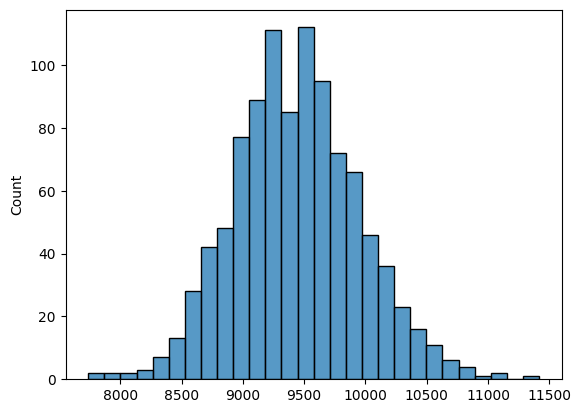

In [ ]:
sns.histplot(data=sampling_distribution_data_male)

In [ ]:
mu=np.mean(sampling_distribution_data_male)
sd=np.std(sampling_distribution_data_male)/np.sqrt(100)

In [ ]:
mu

9438.649589999999

**Average amount spend by Male customers: 9438.64**

In [ ]:
sd

51.46215904484885

In [ ]:
(mu-1.96*sd,mu+1.96*sd)

(9337.783758272095, 9539.515421727903)

**Confidence interval is between 9337.78 and 9539.51**




In [ ]:
sampling_distribution_data_female=[np.mean(purch_female.sample(100)) for i in range(1000)]
sampling_distribution_data_female

[8616.92,
 8761.99,
 8701.86,
 9001.36,
 8886.43,
 8969.98,
 9011.1,
 8502.22,
 9126.31,
 8974.97,
 8868.1,
 8994.69,
 7452.47,
 8385.35,
 8620.48,
 9077.47,
 9132.07,
 8465.21,
 8546.34,
 8402.48,
 8181.94,
 8390.23,
 8533.08,
 8862.7,
 8255.39,
 8654.74,
 9529.7,
 8450.76,
 9452.05,
 8497.27,
 8506.28,
 9250.07,
 9134.15,
 8623.22,
 9010.01,
 7320.97,
 9147.22,
 8757.24,
 8795.3,
 8451.76,
 8750.83,
 9162.06,
 8696.39,
 8795.68,
 9817.08,
 8700.78,
 8271.98,
 9072.49,
 8819.5,
 8876.26,
 9572.76,
 8278.95,
 8595.95,
 8270.25,
 9096.63,
 8359.89,
 8666.1,
 9718.12,
 9793.45,
 9603.22,
 9219.58,
 8036.79,
 8459.92,
 8409.58,
 8476.72,
 8393.0,
 8987.37,
 8657.42,
 8553.55,
 9749.79,
 9107.38,
 8956.52,
 8687.9,
 8883.76,
 8812.39,
 8759.78,
 8802.22,
 9125.91,
 8721.78,
 8732.2,
 9438.27,
 8779.02,
 7713.68,
 8542.56,
 8680.97,
 9385.49,
 8364.53,
 8074.06,
 9200.53,
 8325.59,
 8847.24,
 9018.15,
 8670.12,
 8357.94,
 9110.86,
 9466.23,
 8134.18,
 8689.33,
 8400.03,
 9324.26,
 8368.42,


<Axes: ylabel='Count'>

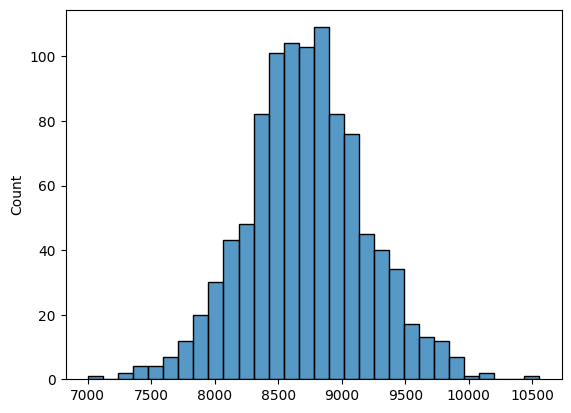

In [ ]:
sns.histplot(data=sampling_distribution_data_female)

In [ ]:
mu1=np.mean(sampling_distribution_data_female)
sd1=np.std(sampling_distribution_data_female)/np.sqrt(100)

In [ ]:
mu1

8715.91374

**Average amount spend by Female customers: 8715.91**

In [ ]:
sd1

47.17405142520752

In [ ]:
(mu-1.96*sd,mu+1.96*sd)

(9073.004218251783, 9271.991861748218)

**Confidence interval is between 9073 and 9272**






**Male spends more money than Female considering the average amount spent by both.**

**Since the confirdence interval is not overlapping, they are not related**

In [ ]:
Mar_purch=df[df["Marital_Status"]==1]["Purchase"]
UnMar_purch=df[df["Marital_Status"]==0]["Purchase"]

In [ ]:
sampling_distribution_data_Mar=[np.mean(Mar_purch.sample(100)) for i in range(1000)]
sampling_distribution_data_Mar

[9524.86,
 9140.63,
 9755.49,
 9490.56,
 8833.6,
 8603.78,
 9841.61,
 8916.39,
 10319.43,
 9530.17,
 10262.09,
 9523.1,
 9767.27,
 9281.9,
 8369.63,
 9068.5,
 8763.95,
 9094.77,
 9743.95,
 10277.36,
 9561.26,
 9639.8,
 8970.65,
 9251.7,
 8892.86,
 9290.37,
 10201.25,
 8982.57,
 9608.75,
 9171.46,
 8483.39,
 9914.5,
 8390.68,
 8938.48,
 9186.34,
 8484.9,
 9124.21,
 8738.75,
 8806.43,
 9050.79,
 9127.66,
 9455.06,
 9216.88,
 9128.31,
 9923.32,
 9552.67,
 8597.06,
 9180.23,
 9234.58,
 8574.08,
 9284.7,
 10409.54,
 9051.62,
 8554.46,
 9289.44,
 8745.25,
 8905.58,
 9404.08,
 8932.04,
 7743.58,
 9149.72,
 8785.96,
 8569.13,
 10202.09,
 9348.15,
 9599.33,
 10294.98,
 7786.56,
 9042.47,
 9126.27,
 10001.66,
 8411.84,
 9419.95,
 8783.46,
 8433.41,
 9330.17,
 8896.65,
 10129.41,
 8783.11,
 8442.05,
 8847.95,
 9170.2,
 9328.41,
 8858.89,
 8906.01,
 9433.23,
 9445.56,
 9362.57,
 8972.73,
 8717.39,
 9190.47,
 9393.94,
 8946.24,
 9657.1,
 8727.34,
 8354.88,
 8913.79,
 10044.02,
 9004.32,
 9371.6,
 9

<Axes: ylabel='Count'>

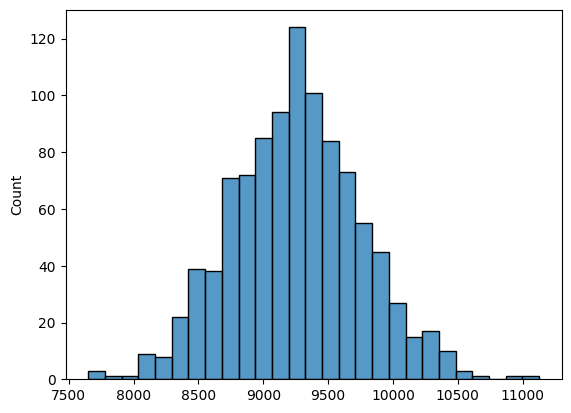

In [ ]:
sns.histplot(sampling_distribution_data_Mar)

**It is a Normal distribution plot**

In [ ]:
mu=np.mean(sampling_distribution_data_Mar)
mu


9255.90842

**Average amount spend by married customers: 9256**

In [ ]:
sd=np.std(sampling_distribution_data_Mar)/np.sqrt(100)
sd

49.761339640156756

In [ ]:
(mu-1.96*sd,mu+1.96*sd)

(9158.376194305292, 9353.440645694707)

**Confidence interval is between 9159 and 9359**


In [ ]:
sampling_distribution_data_UnMar=[np.mean(UnMar_purch.sample(100)) for i in range(1000)]
sampling_distribution_data_UnMar

[9811.13,
 9304.83,
 8994.06,
 9136.98,
 8676.26,
 9352.54,
 8732.34,
 9758.05,
 9595.16,
 8989.95,
 9532.18,
 8736.38,
 9379.23,
 9067.86,
 9123.82,
 9997.46,
 9751.9,
 8954.32,
 9475.4,
 9425.77,
 9842.91,
 9276.43,
 9277.26,
 9028.5,
 8596.52,
 9447.84,
 9127.75,
 8654.74,
 9287.63,
 9441.01,
 9077.75,
 9775.77,
 8858.18,
 8649.48,
 8193.61,
 9331.89,
 9286.48,
 9420.17,
 9602.8,
 9409.77,
 8441.19,
 9058.75,
 9794.93,
 10728.48,
 9491.67,
 8931.07,
 8595.13,
 9211.28,
 9320.9,
 10404.93,
 9111.65,
 9452.12,
 8916.21,
 9064.52,
 10002.99,
 8048.28,
 8762.5,
 8947.24,
 8767.1,
 9483.59,
 8907.33,
 8858.46,
 10067.75,
 9538.84,
 10370.8,
 9057.0,
 9794.39,
 9640.57,
 9082.05,
 8820.7,
 9308.76,
 8984.07,
 10094.5,
 8619.03,
 8672.38,
 8989.47,
 10066.39,
 9553.88,
 8894.17,
 9918.76,
 9022.98,
 8022.87,
 9390.13,
 8606.45,
 8542.15,
 8477.56,
 8989.29,
 7834.55,
 8816.63,
 9526.53,
 10070.05,
 9309.27,
 8697.47,
 8754.32,
 9171.8,
 8355.7,
 9772.77,
 9121.84,
 8848.91,
 8825.83,
 8980

<Axes: ylabel='Count'>

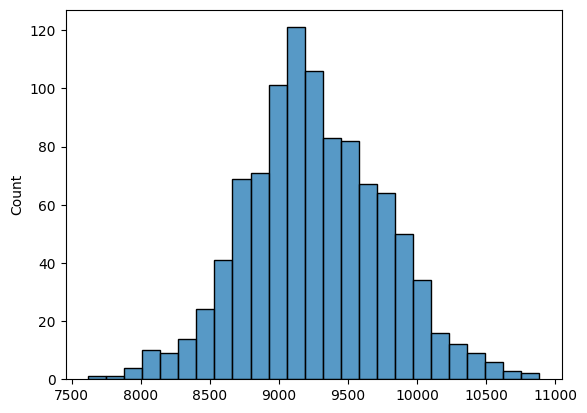

In [ ]:
sns.histplot(sampling_distribution_data_UnMar)

**It is a Normal distribution plot**

In [ ]:
mu=np.mean(sampling_distribution_data_UnMar)
mu

9260.44331

**Average amount spend by married customers: 9260**

In [ ]:
sd=np.std(sampling_distribution_data_UnMar)/np.sqrt(100)
sd

50.544800809612845

In [ ]:
(mu-1.96*sd,mu+1.96*sd)

(9161.37550041316, 9359.511119586841)

**Confidence interval is between 9161 and 9359**

**Unmarried spends less money than Married considering the average amount spent by both.**

**Since the confirdence interval is  overlapping, they are  related**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
age_list=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

In [ ]:
df1=df[["User_ID","Age","Purchase"]]

Creating a new dataset consists of user_id, age, purchase

In [ ]:
df1

,User_ID,Age,Purchase
0,1000001,0-17,8370
1,1000001,0-17,15200
2,1000001,0-17,1422
3,1000001,0-17,1057
4,1000002,55+,7969
...,...,...,...
550063,1006033,51-55,368
550064,1006035,26-35,371
550065,1006036,26-35,137
550066,1006038,55+,365


In [ ]:
for Age in age_list:
  sampling_distribution_data=[np.mean((df1[df1["Age"]==Age]["Purchase"]).sample(100)) for i in range(1000)]
  print(sampling_distribution_data)

[9235.96, 9422.52, 8376.73, 9029.73, 8688.63, 8579.07, 8854.08, 9063.61, 9703.78, 8779.06, 7459.46, 8849.23, 8958.65, 8871.82, 9283.67, 9293.48, 9485.46, 8028.35, 8670.25, 8521.24, 8853.65, 8845.27, 9338.52, 8560.25, 8427.44, 9223.26, 9120.29, 9567.91, 8781.1, 9382.05, 8076.0, 8988.04, 8572.78, 8581.92, 8499.49, 9595.36, 8964.59, 8558.39, 9579.93, 9215.72, 8980.34, 9736.04, 9435.92, 8912.7, 9051.41, 8505.27, 8494.16, 8128.78, 8621.43, 9307.47, 8944.73, 9292.94, 9645.77, 8312.53, 9030.23, 9860.61, 8473.51, 8485.35, 9918.22, 9500.04, 8909.2, 8449.33, 8243.2, 8778.63, 8217.36, 9284.4, 9016.74, 8658.56, 8996.94, 9746.19, 8867.06, 8450.09, 9433.32, 9578.27, 9134.01, 8905.6, 8568.47, 10042.51, 8714.09, 7884.96, 9154.81, 9063.23, 8304.07, 9806.19, 8113.97, 9355.48, 9757.55, 9052.63, 9245.52, 7942.35, 8762.59, 9043.02, 9543.98, 9208.22, 8783.32, 9161.64, 8706.77, 9222.27, 8594.2, 8248.23, 8960.35, 8740.56, 8679.17, 9433.31, 8583.44, 9964.6, 8237.25, 9400.98, 10191.26, 8478.84, 8951.13, 8643.37

<Axes: ylabel='Count'>

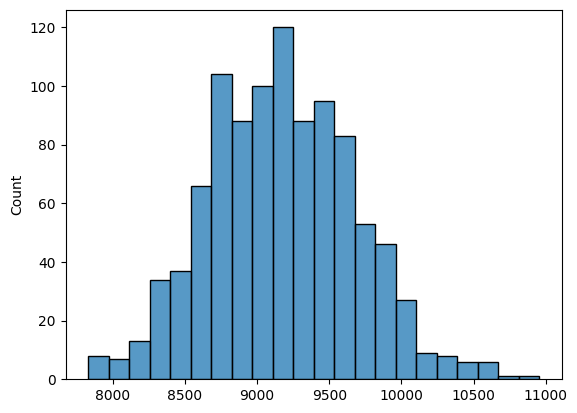

In [ ]:
sns.histplot(sampling_distribution_data)

**It is a Normal distribution plot**

In [ ]:
mu=np.mean(sampling_distribution_data)
mu

9172.49804

**Average amount spend by married customers: 9172**

In [ ]:
sd=np.std(sampling_distribution_data)/np.sqrt(100)
sd

50.76215395317247

In [ ]:
(mu-1.96*sd,mu+1.96*sd)

(9073.004218251783, 9271.991861748218)

**Confidence interval is between 9073 and 9271**

# Recommendations:

Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

Married customers spend more money than Unmarried customers, So company should focus on acquisition of Married customers.

The management should have some offers on kids (0-17 years) in order to increase sales.

In order to attract more young shoppers, they can offer some games for the younger generation.